## importing the required packages and modules

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## loading the raw data

In [3]:
raw_data=pd.read_csv("../data/raw/data.csv")

## Data Understanding

In [6]:
#shape of the data
raw_data.shape

(95662, 16)

In [7]:
#some rows from the data
raw_data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [8]:
raw_data.tail()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13T09:54:09Z,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13T09:54:25Z,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13T09:54:35Z,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13T10:01:10Z,2,0
95661,TransactionId_35670,BatchId_29317,AccountId_4841,SubscriptionId_3829,CustomerId_1709,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:01:28Z,2,0


In [9]:
# columns of the data
raw_data.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

In [11]:
# datatypes of the columns 
raw_data.dtypes

TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

In [12]:
# general information about the data
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [13]:
# total number of nan values with inne ach columns 
raw_data.isna().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

## 	Summary Statistics of the data

In [14]:
raw_data.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


## Data preparation

In [15]:
# drop columns with a value of Nan or null
processed_data=raw_data.dropna(how="all",axis=1)

In [16]:
# correct the colimn to the right format of time 
processed_data["TransactionStartTime"]=pd.to_datetime(processed_data["TransactionStartTime"])

In [17]:
# Removes all but the first occurrence of each duplicate row.
processed_data.drop_duplicates()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13 09:54:09+00:00,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13 09:54:25+00:00,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13 09:54:35+00:00,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13 10:01:10+00:00,2,0


## analyze the distribution of numerical features

In [18]:
#identifing numerical features with in a data
numerical_features=processed_data.select_dtypes(include=["int64","float64"])

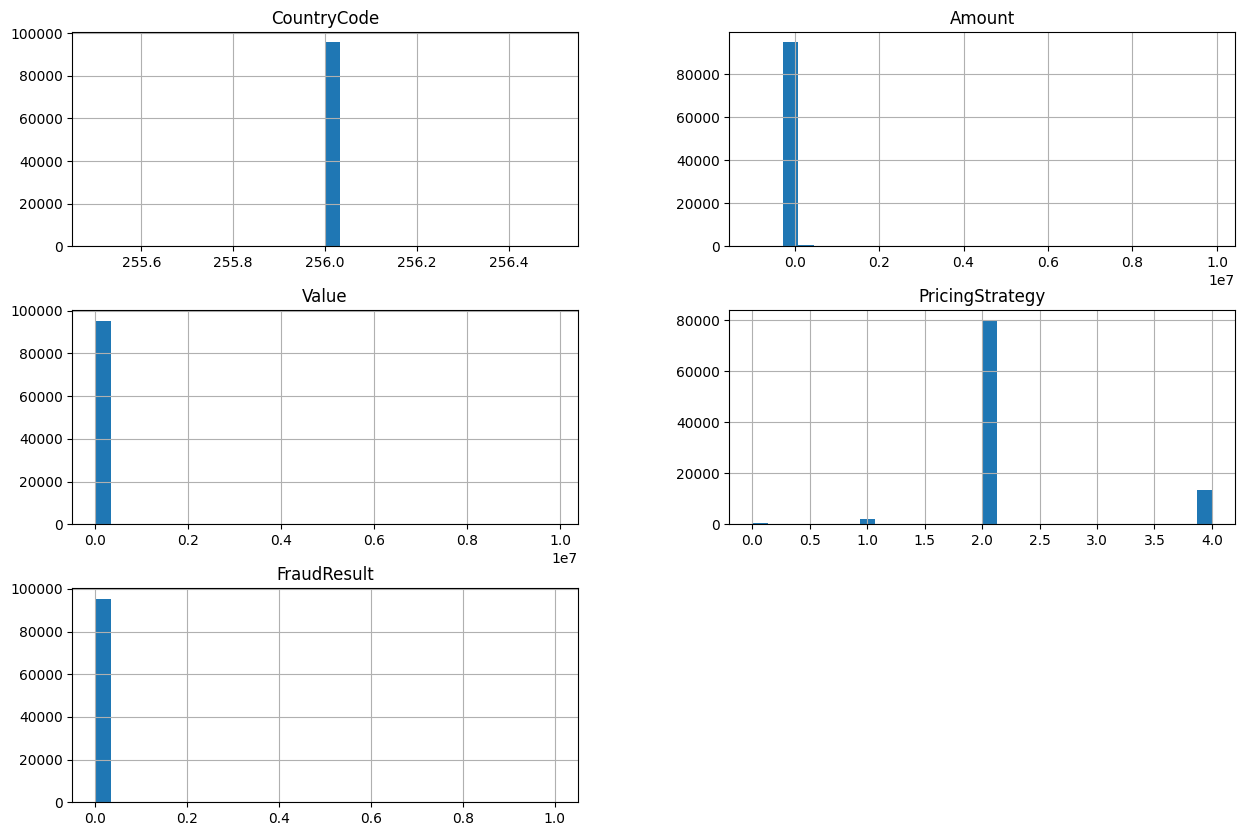

In [19]:
# Histograms (Quick Overview of Distributions)
numerical_features.hist(bins=30,figsize=(15,10))
plt.title("distribution of nemrical features")
plt.show()

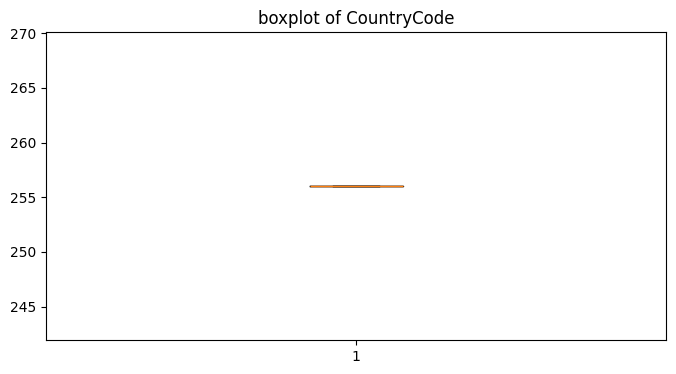

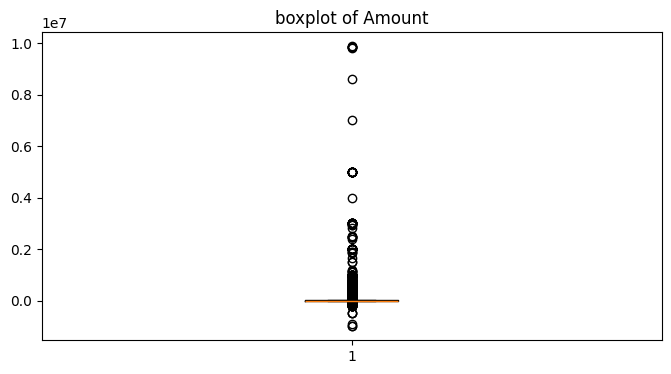

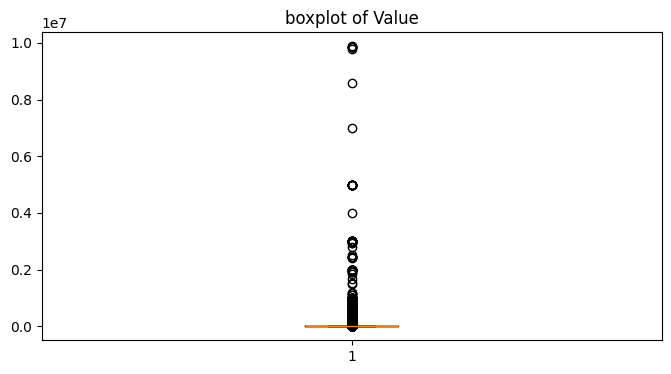

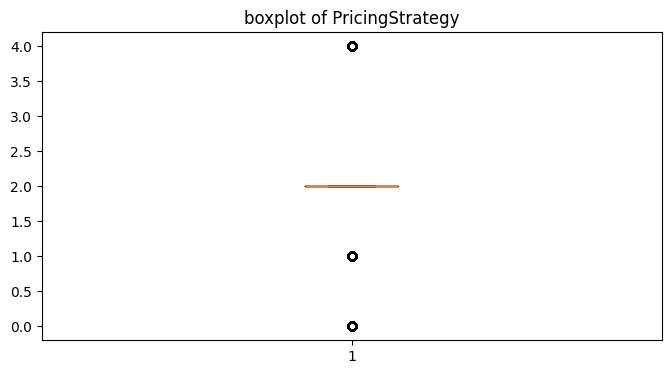

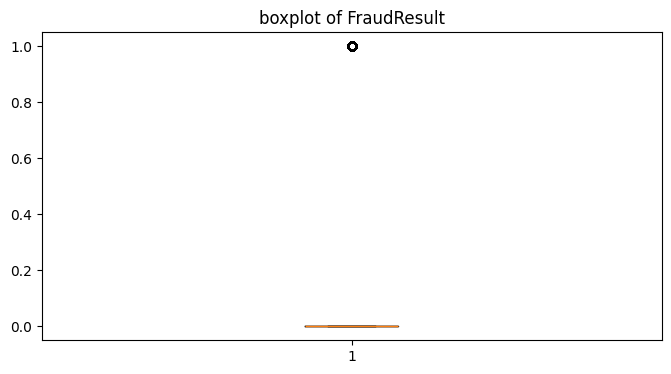

In [21]:
# Boxplot for spotting outliers
for column in numerical_features.columns:
    plt.figure(figsize=(8,4))
    plt.boxplot(processed_data[column])
    plt.title(f"boxplot of {column}")
    plt.show()

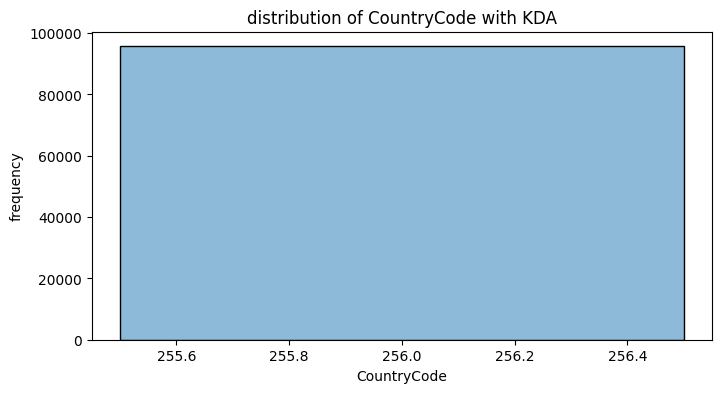

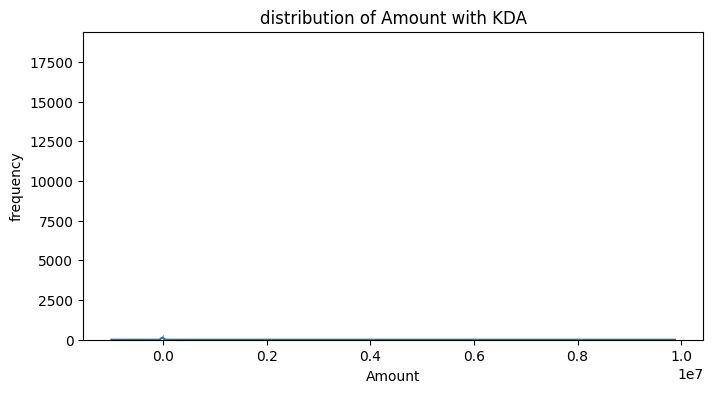

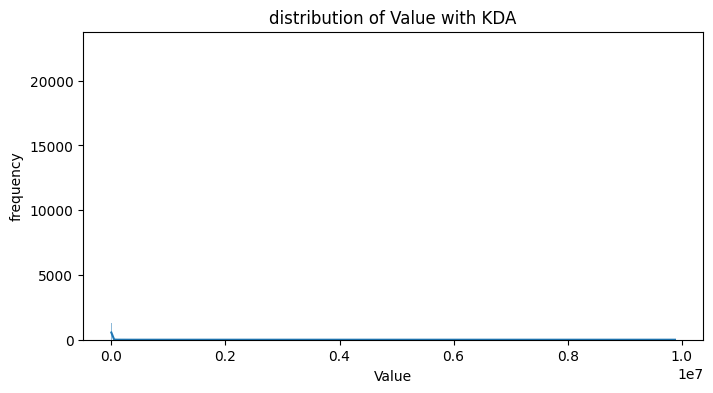

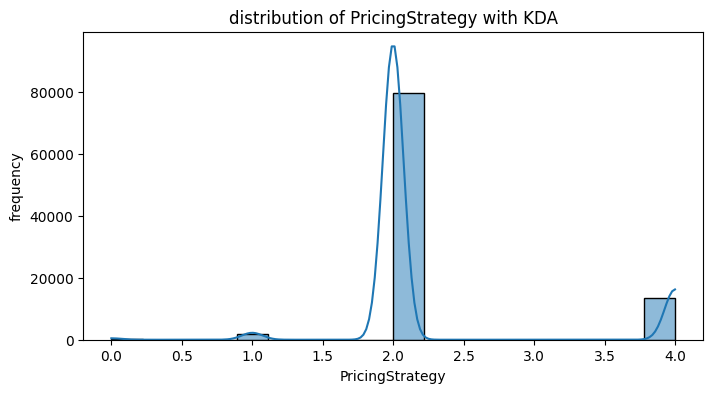

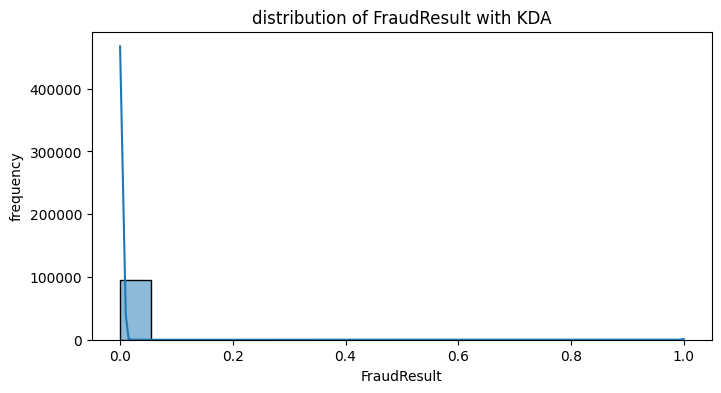

In [22]:
# Distribution with KDE (for Skewness & Smoothness)
for column in numerical_features.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(x=processed_data[column],kde=True)
    plt.title(f"distribution of {column} with KDA")
    plt.xlabel(column)
    plt.ylabel("frequency")
    plt.show()

In [24]:
#Check Skewness and Kurtosis
print(numerical_features.skew()) # for skewness

print(numerical_features.kurtosis()) #for kurtosis 

CountryCode         0.000000
Amount             51.098490
Value              51.291086
PricingStrategy     1.659057
FraudResult        22.196295
dtype: float64
CountryCode           0.000000
Amount             3363.127739
Value              3378.069274
PricingStrategy       2.087534
FraudResult         490.685762
dtype: float64


## analyze the distribution of catagorical features

In [36]:
# identifing the catagorical features 
catagorical_features=processed_data.select_dtypes(include=["object","bool","category"])


In [37]:
# Value Counts (Frequency Table)
for column in catagorical_features.columns:
    print(f"\n-{column} --")
    print(processed_data[column].value_counts())


-TransactionId --
TransactionId
TransactionId_35670     1
TransactionId_76871     1
TransactionId_73770     1
TransactionId_26203     1
TransactionId_380       1
                       ..
TransactionId_64044     1
TransactionId_98367     1
TransactionId_122975    1
TransactionId_118831    1
TransactionId_86903     1
Name: count, Length: 95662, dtype: int64

-BatchId --
BatchId
BatchId_67019     28
BatchId_51870     16
BatchId_113893    14
BatchId_127204    12
BatchId_116835    10
                  ..
BatchId_88196      1
BatchId_55755      1
BatchId_89378      1
BatchId_127156     1
BatchId_69178      1
Name: count, Length: 94809, dtype: int64

-AccountId --
AccountId
AccountId_4841    30893
AccountId_4249     4457
AccountId_4840     1738
AccountId_3206     1105
AccountId_318      1070
                  ...  
AccountId_2728        1
AccountId_3778        1
AccountId_1259        1
AccountId_1948        1
AccountId_918         1
Name: count, Length: 3633, dtype: int64

-SubscriptionId -

In [ ]:
# Bar Plots for Visualizing Distributions
for column in catagorical_features.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(x=column,data=processed_data)
    plt.title(f"distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("count")
    plt.show()

In [42]:
#  Check Number of Unique Categories
print(catagorical_features.nunique())

TransactionId      95662
BatchId            94809
AccountId           3633
SubscriptionId      3627
CustomerId          3742
CurrencyCode           1
ProviderId             6
ProductId             23
ProductCategory        9
ChannelId              4
dtype: int64


## Correlation Analysis

In [34]:
# Compute Correlation Matrix
correlation_matrics=numerical_features.corr()
print(correlation_matrics)

                 CountryCode    Amount     Value  PricingStrategy  FraudResult
CountryCode              NaN       NaN       NaN              NaN          NaN
Amount                   NaN  1.000000  0.989692        -0.061931     0.557370
Value                    NaN  0.989692  1.000000        -0.017020     0.566739
PricingStrategy          NaN -0.061931 -0.017020         1.000000    -0.033821
FraudResult              NaN  0.557370  0.566739        -0.033821     1.000000


In [ ]:
# Visualize Correlation with Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

## 6.	Identifying Missing Values

In [33]:
# count the number of missing values from wach columns
missing_values=processed_data.isnull().sum()
print(missing_values)

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


In [38]:
# Check Percentage of Missing Values
missing_percent = (raw_data.isnull().sum() / len(raw_data)) * 100
missing_df = pd.DataFrame({'Missing Count': missing_values, 'Missing %': missing_percent})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing %', ascending=False)
print(missing_df)

Empty DataFrame
Columns: [Missing Count, Missing %]
Index: []


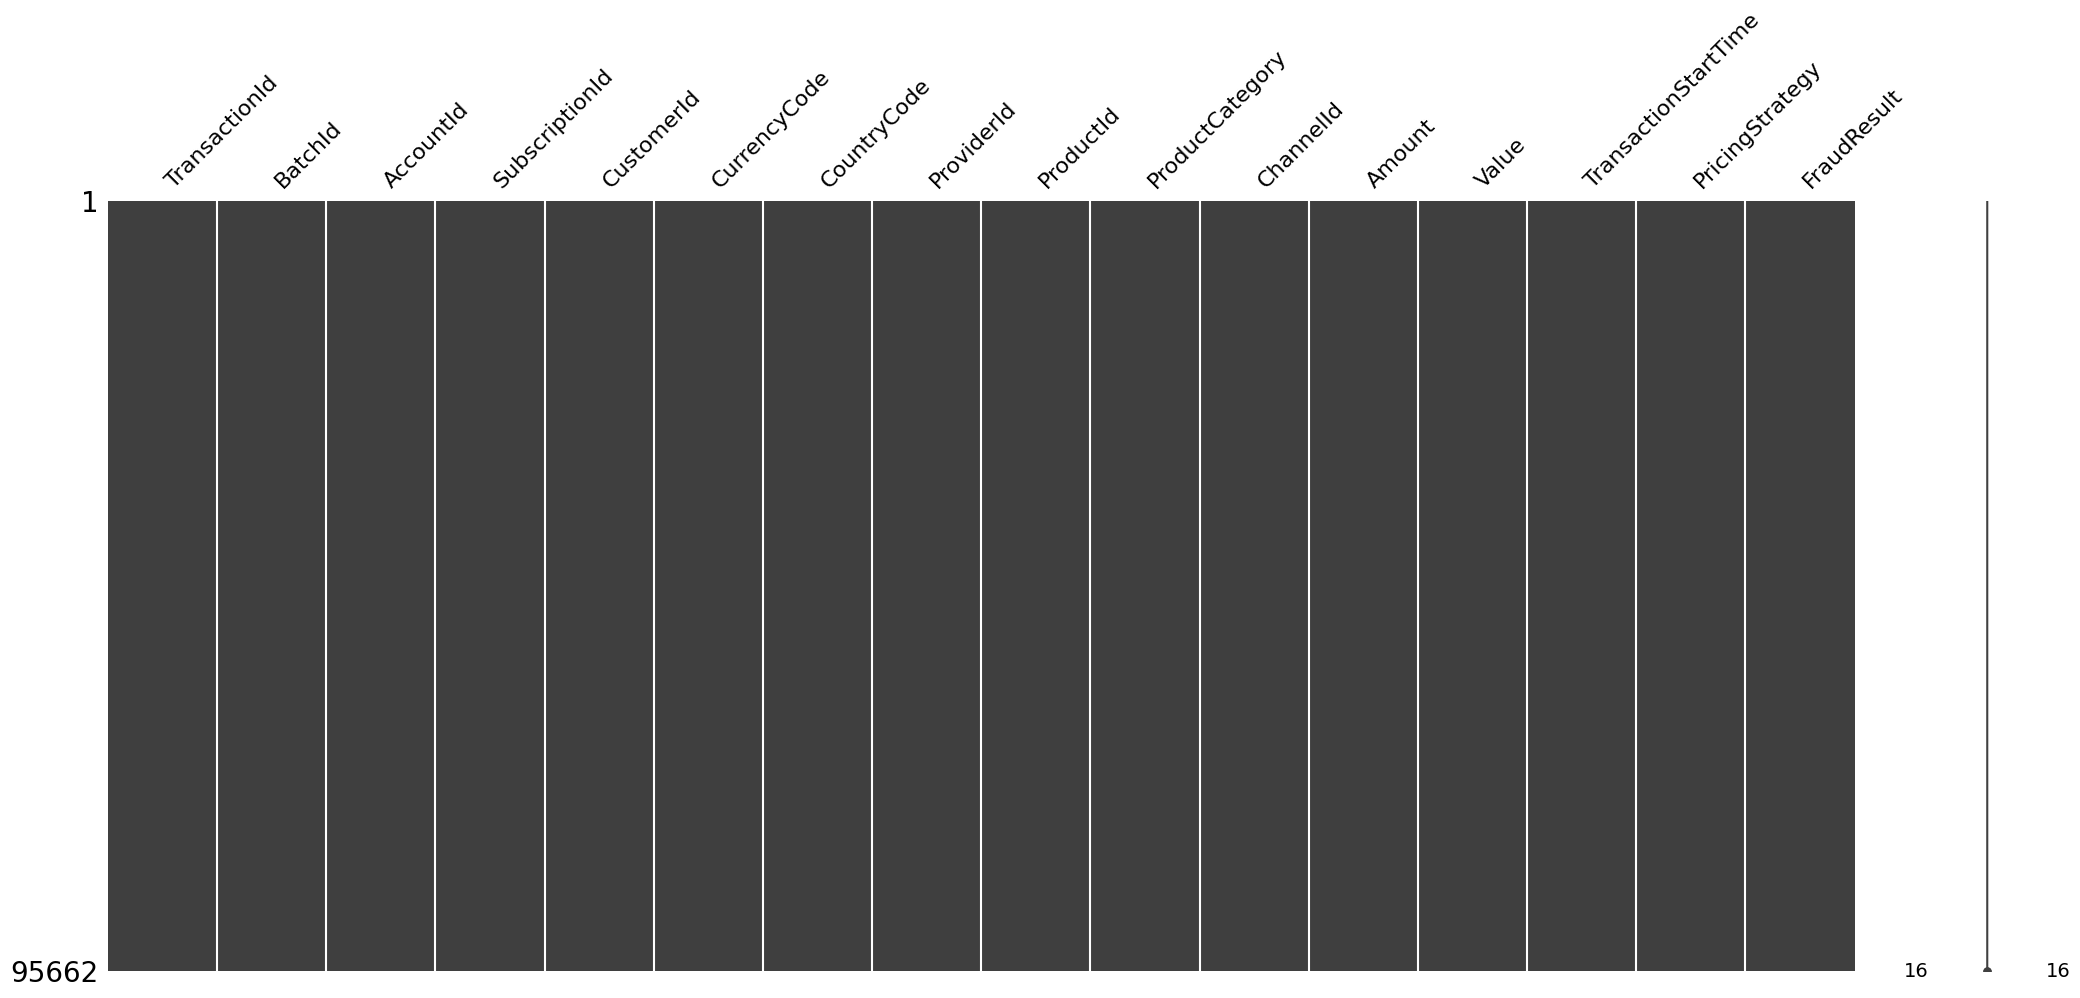

C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


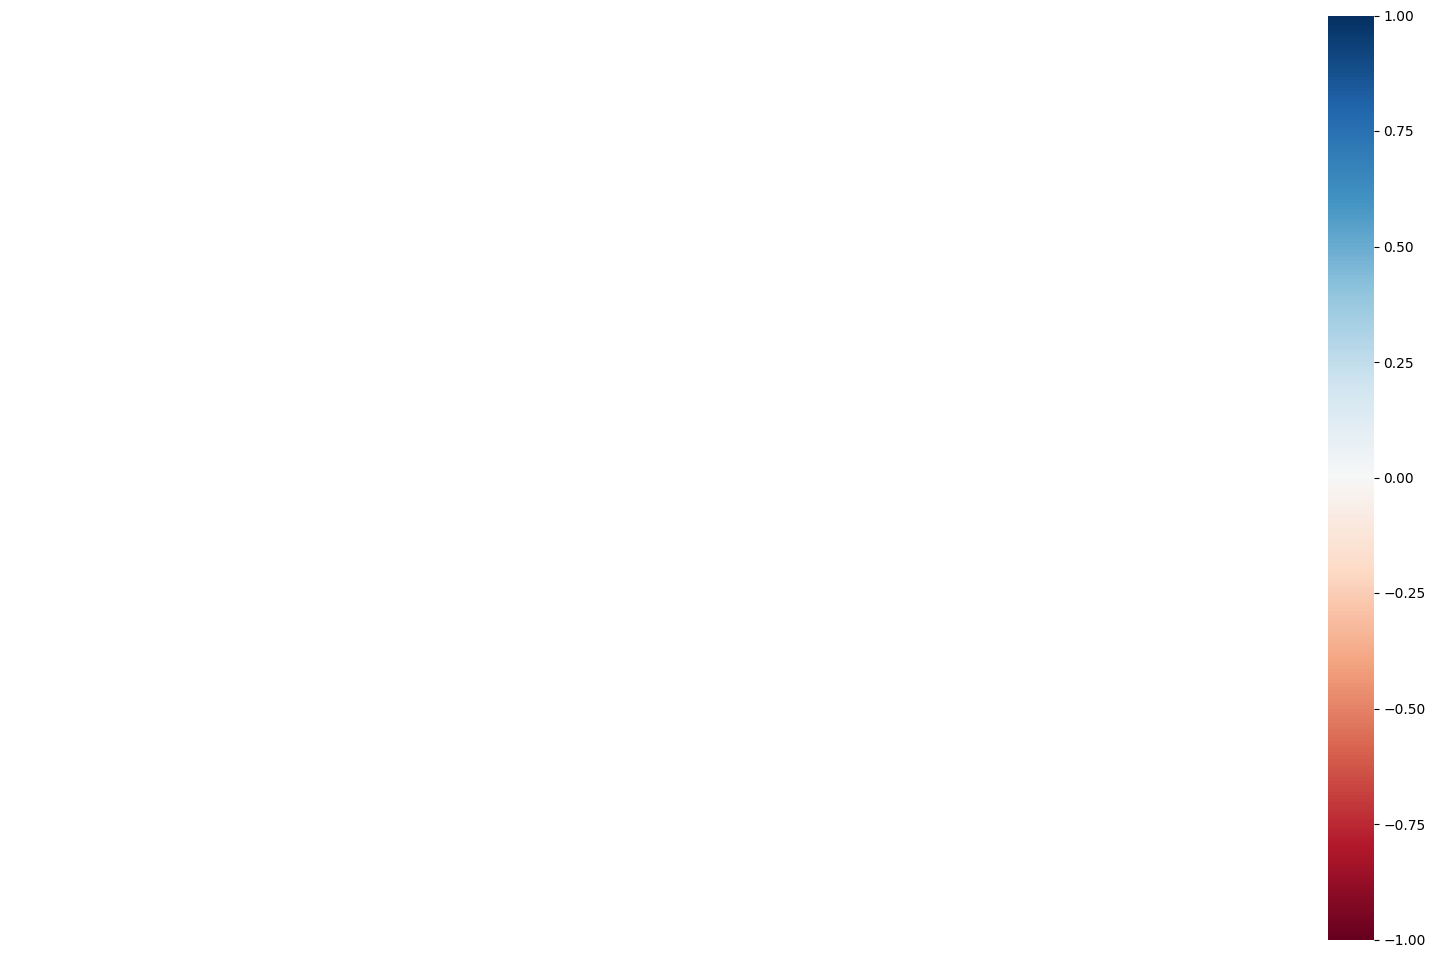

In [39]:
# Visualize Missing Data

msno.matrix(raw_data)
plt.show()

msno.heatmap(raw_data)
plt.show()


In [32]:
# Count rows with any missing value
rows_with_missing = raw_data.isnull().any(axis=1).sum()
print(f"Number of rows with missing values: {rows_with_missing}")


Number of rows with missing values: 0


## Detect Outliers with Boxplots

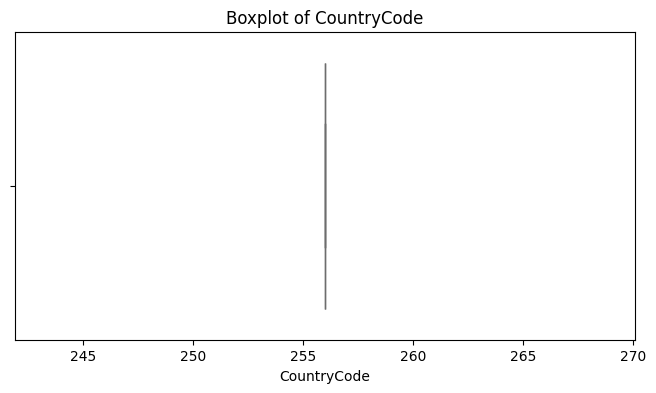

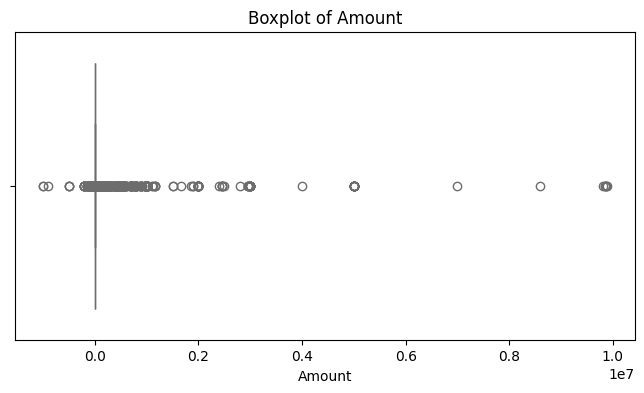

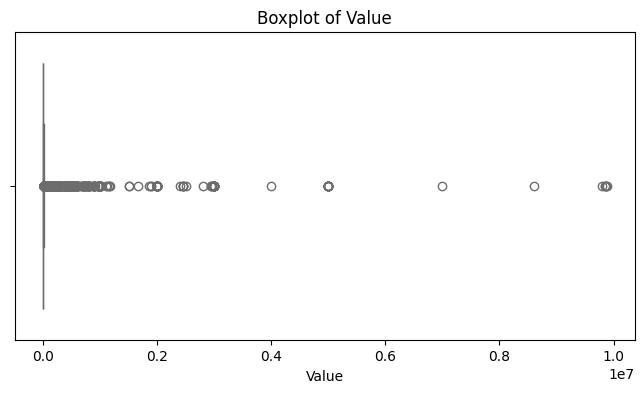

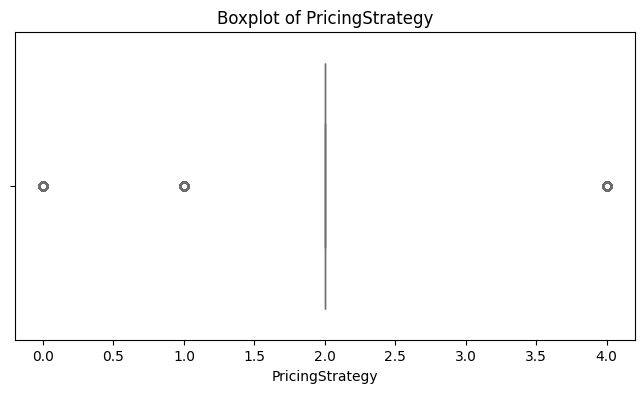

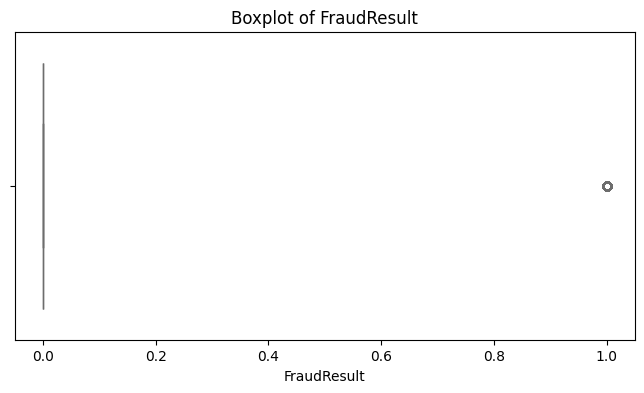

In [40]:
# Detect Outliers with Boxplots
for column in numerical_features.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=raw_data[column], color='salmon')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

In [31]:
processed_data.to_csv(r"C:\Users\user\Desktop\credit-risk-model\data\processed\cleaned_data.csv",index=False)